In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, log_loss
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import os

In [37]:
df = pd.read_csv('Kyphosis.csv')
df.head(2)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14


In [39]:
le = LabelEncoder()
df['Kyphosis'] = le.fit_transform(df['Kyphosis'])
df.head(2)

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14


In [18]:
x = df.drop('Kyphosis', axis =1)
y = df['Kyphosis']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y,random_state=24)

In [20]:
logr = LogisticRegression()
logr.fit(x_train,y_train)
print(logr.intercept_, logr.coef_)
y_pred_prob = logr.predict_proba(x_test)
y_pred = logr.predict(x_test)
y_pred

[0.12694123] [[ 0.01203504  0.14784746 -0.29536472]]


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

Text(0, 0.5, 'sensitivity')

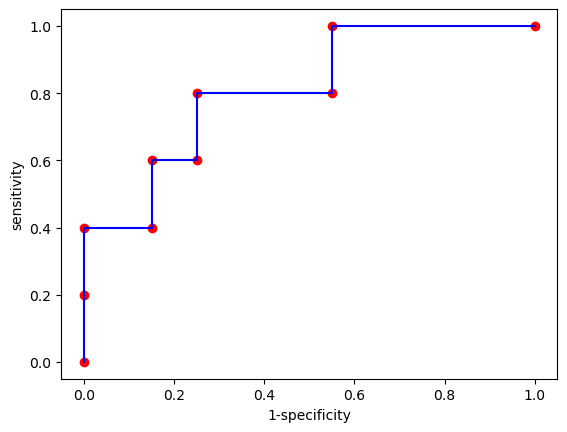

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.scatter(fpr, tpr, c='red')
plt.plot(fpr, tpr, c='blue')
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')

In [26]:
print(fpr, tpr)
print(thresholds)

[0.   0.   0.   0.15 0.15 0.25 0.25 0.55 0.55 1.  ] [0.  0.2 0.4 0.4 0.6 0.6 0.8 0.8 1.  1. ]
[1.87948071 0.87948071 0.80990174 0.75271264 0.68610945 0.4870399
 0.43040777 0.09520026 0.09262017 0.01350412]


In [22]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.81

In [34]:
# KFold
lr = LogisticRegression(penalty=None)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
results = cross_val_score(lr, x, y, cv=kfold, scoring='neg_log_loss')
results.mean()

-0.436546346292387

In [31]:
log_loss(y_test, y_pred_prob[:,1])

0.46105194320069365